In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

In [6]:
# Data cleaning
df.dropna(inplace=True)
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.shape

(2200, 8)

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

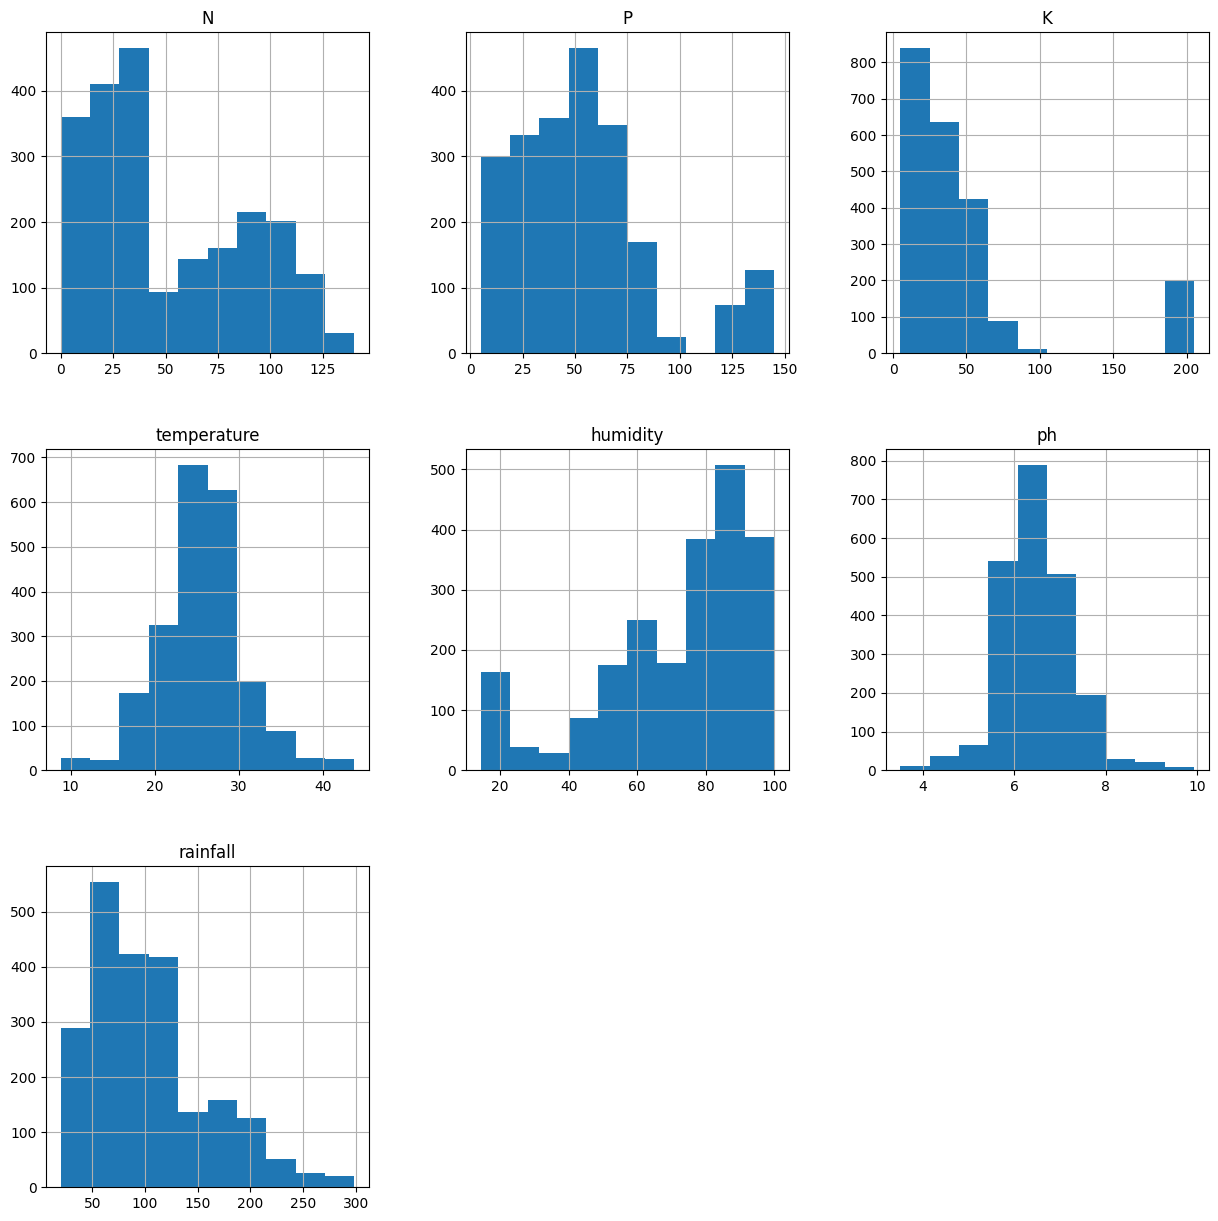

In [9]:
# Plot histogram of all the features in the dataset
df.hist(figsize=(15,15))

In [10]:
# Unique label in the dataset
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['label'], axis = 1)
Y = df['label']
labels = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.25,random_state =2)

In [13]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)
from sklearn import metrics
RF_acc_score = metrics.accuracy_score(Ytest,predicted_values)
print(f"The accuracy of the Random forest is: {RF_acc_score}")

The accuracy of the Random forest is: 0.990909090909091


In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
DT_acc_score = metrics.accuracy_score(Ytest,predicted_values)
print(f"The accuracy of the Decision tree is: {DT_acc_score}")

The accuracy of the Random forest is: 0.8527272727272728


In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
LR_acc_score = metrics.accuracy_score(Ytest,predicted_values)
print(f"The accuracy of the Logistic Regression is: {LR_acc_score}")

The accuracy of the Logistic Regression is: 0.9563636363636364


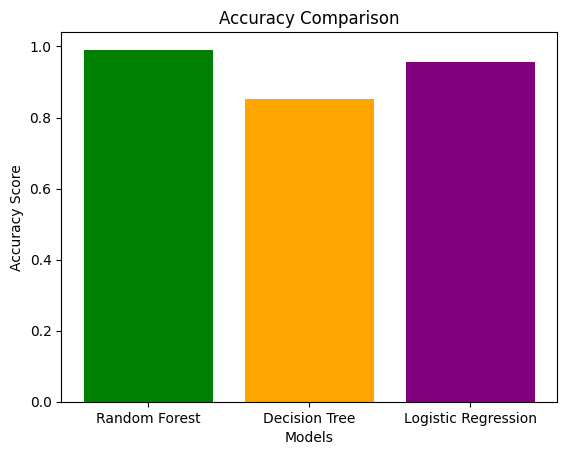

In [16]:
# Graph for all the models
import matplotlib.pyplot as plt
acc_score_list = [RF_acc_score,DT_acc_score,LR_acc_score]
models_list = ['Random Forest','Decision Tree','Logistic Regression']
color=['green','orange','purple']
plt.bar(models_list,acc_score_list,color=color)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y)
X = df[['temperature','humidity','ph','rainfall']]  #Features
y = df['label']   # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
decision_tree_clf = DecisionTreeClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
logistic_regression_clf = LogisticRegression(max_iter=1000, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train models
models = {
    'Decision Tree': decision_tree_clf,
    'Random Forest': random_forest_clf,
    'Logistic Regression': logistic_regression_clf
}

accuracies = {}

for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test if name != 'Logistic Regression' else X_test_scaled)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")

# Selects the model with the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

# Allow the user to input values for environmental conditions
new_data = {

    'temperature': float(input("Enter temperature: ")),
    'humidity': float(input("Enter humidity: ")),
    'ph': float(input("Enter pH: ")),
    'rainfall': float(input("Enter rainfall: "))
}

# Convert the input data to a DataFrame
new_df = pd.DataFrame([new_data])

# Standardize features for Logistic Regression
new_data_scaled = scaler.transform(new_df) if best_model_name == 'Logistic Regression' else new_df

# Make a prediction using the best model
predicted_label = best_model.predict(new_data_scaled)[0]

# Print the predicted label
print(f"Predicted crops for the land using {best_model_name}: {predicted_label}")


Decision Tree Accuracy: 93.18%
Random Forest Accuracy: 96.59%
Logistic Regression Accuracy: 75.91%
Enter temperature: 20
Enter humidity: 200
Enter pH: 5
Enter rainfall: 200
Predicted crops for the land using Random Forest: coconut


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

specified_label = input("Enter the crop that you want to plant: ")

# Filter the dataset for the specified label
df_specified_label = df[df['label'] == specified_label]

# Separate features (X) and targets (Y)
X = df_specified_label[['temperature', 'humidity','ph', 'rainfall']]
Y_N = df_specified_label['N']
Y_P = df_specified_label['P']
Y_K = df_specified_label['K']

# Split the dataset into training and testing sets
X_train, X_test, Y_N_train, Y_N_test, Y_P_train, Y_P_test, Y_K_train, Y_K_test = train_test_split(
    X, Y_N, Y_P, Y_K, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest regressors for N, P, and K
rf_N = RandomForestRegressor(random_state=42)
rf_P = RandomForestRegressor(random_state=42)
rf_K = RandomForestRegressor(random_state=42)

rf_N.fit(X_train, Y_N_train)
rf_P.fit(X_train, Y_P_train)
rf_K.fit(X_train, Y_K_train)

# Make predictions on the test set
Y_N_pred = rf_N.predict(X_test)
Y_P_pred = rf_P.predict(X_test)
Y_K_pred = rf_K.predict(X_test)


# Predict the N, P, K for a new set of features
new_features = np.array([[20, 70, 6, 200]])
predicted_N = rf_N.predict(new_features)[0]
predicted_P = rf_P.predict(new_features)[0]
predicted_K = rf_K.predict(new_features)[0]

print(f'Predicted N for {specified_label}: {predicted_N}')
print(f'Predicted P for {specified_label}: {predicted_P}')
print(f'Predicted K for {specified_label}: {predicted_K}')

Enter the crop that you want to plant: rice
Predicted N for rice: 81.43
Predicted P for rice: 52.11
Predicted K for rice: 37.26
